# 통계학

- 통계학은 자료를 분석하는 학문

## 자료

- 모집단
    - 모수: 모집단의 특성

- 표본 집단
    - 통계량: 모수에 대응하는 표본의 특성

## 변수

- 숫자로 표현할 수 있는 특성을 확률변수 라고한다.
    - 이산확률 변수: 가족의 수, 성공과 실패, 여자와 남자
    
    - 연속확률 변수: 소득 액, 주택 가격

## Histogram

- 자료를 정리하기 위한 그림
- 하나의 변수에 대해서 분석하기 용이하다.
- 숫자 구간별로 그 구간에 속한 자료의 개수 또는 점유율을 보여주는 그림

    - 경험적 Histogram
    - 확률 Historgram

### 이산변수의 경험적 Histrogram

In [2]:
import math as m
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
def toss_dice(n=100):
    return np.random.choice(np.arange(1, 7, 1), size= n) # 각 경우의 수에 따라 p가 주어져있다.

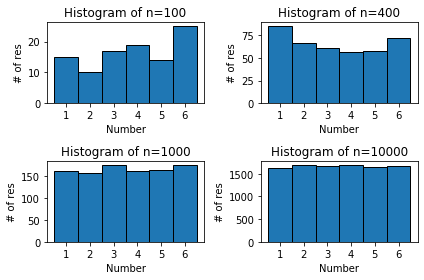

In [4]:
#주사위 던지기
res = toss_dice(n=100)
res2 = toss_dice(n=400)
res3 = toss_dice(n=1000)
res4 = toss_dice(n=10000)

title=['n=100', 'n=400', 'n=1000', 'n=10000']
res_l=[res, res2, res3, res4]

fig, axes = plt.subplots(2, 2, figsize=(6,4))

idx = 0
for i in range(2):
    for j in range(2):
        ax = axes[i][j]
        ax.hist(res_l[idx], bins=np.arange(0.5, 7, 1), ec='k')
        ax.set_xticks([1, 2, 3, 4, 5, 6])
        ax.set_title(f'Histogram of {title[idx]}')
        ax.set_xlabel('Number')
        ax.set_ylabel('# of res')
        idx += 1    
        
plt.tight_layout()

### 연속변수의 경험적 Histogram

In [5]:
DF = pd.read_csv('C://Users/anjae/Documents/[0] Dataset/health_screening/Health_screenings.csv')
DF_weight = DF[['체중(5Kg단위)']]
DF_weight.head()

,체중(5Kg단위)
0,60
1,55
2,70
3,45
4,50


Text(0, 0.5, '# of people')

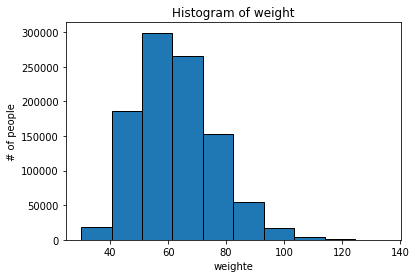

In [6]:
plt.hist(DF_weight.values, ec='k')
plt.title('Histogram of weight')
plt.xlabel('weighte')
plt.ylabel('# of people')

### 통계치

- 통계치: 표본집단으로부터 얻을 수 있는 표본의 특성

- 모집단에서 표본을 추출하고, 그 표본으로부터 얻을 수 있는 대표적 통계치
    - 평균, 중앙값, 표준편차, 사분위수 범위

In [7]:
class Statistics(object):
    def __init__(self, data):
        self.data = np.array(data)
        
    def mean(self):
        res = 0
        for i in self.data:
            res += i
            
        res = res/len(self.data)
        
        return res
    
    def median(self):
        data_sort = sorted(self.data)
        
        if len(self.data) % 2 == 0:
            idx = int(len(self.data)/2)
            res = (data_sort[idx] + data_sort[idx + 1])/2
        else:
            idx = (len(self.data) +1) / 2
            res = data_sort[idx]

        return res

    def most_fequent(self):
        tmp_dict = {str(i):1 for i in np.unique(self.data)}
        
        for i in self.data.reshape(-1):
            tmp_dict[str(i)] += 1
            
        return int(max(tmp_dict, key=lambda x: tmp_dict[x]))

In [8]:
s = Statistics(DF_weight)
mean_val = s.mean()
median_val = s.median()
moFe = s.most_fequent()

print('평균', mean_val)
print('중앙값', median_val)
print('최빈값', moFe)

평균 [63.589255]
중앙값 [60.]
최빈값 60


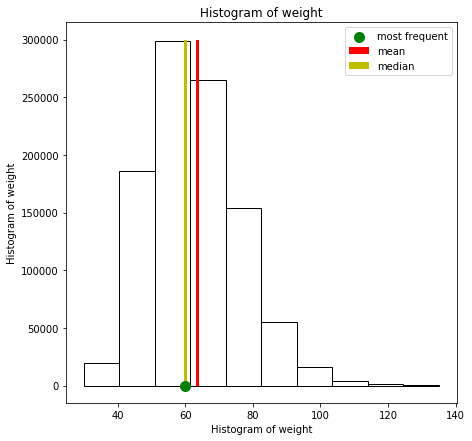

In [9]:
fig, ax= plt.subplots(sharex=True, figsize=(7, 7))
ax.scatter(moFe, 0, color='g', s=100, label='most frequent', zorder=2)
ax.hist(DF_weight.values, ec='k', color='white')
ax.bar(mean_val, height=300000, color='r', label='mean')
ax.bar(median_val, height=300000, color='y', label='median')


ax.set_title('Histogram of weight')
ax.set_xlabel('Histogram of weight')
ax.set_ylabel('Histogram of weight')
ax.legend()

In [10]:
from collections import Counter as cc

cnt = cc(DF_weight.values.reshape(-1))
cnt.most_common()[0]

(60, 150199)

### 평균의 법칙

- 경험적 histogram을 생성하는 랜덤변수 X를 무한히 반복하면 확률 히스토그램으로 수렴한다.

In [26]:
def toss_dice(n=100):
    d1 = np.random.choice(np.arange(1, 7, 1), size= n)
    d2 = np.random.choice(np.arange(1, 7, 1), size= n)
    return d1+d2

def cal_prob_dice():
    number_of_cases = 36
    dice_pair = [(i, j) for i in range(1, 7) for j in range(1, 7)]
    dice_dict = {str(i):0 for i in range(2, 13)}
    
    for i in range(2, 13):
        val = np.sum(np.sum(dice_pair, axis=1) == i)
        dice_dict[str(i)] = val
    
    prob = np.array(list(dice_dict.values())) / 36
    return prob * 100
    


##### 경험적 Histrogram -> 확률 Histogram 으로 수렴

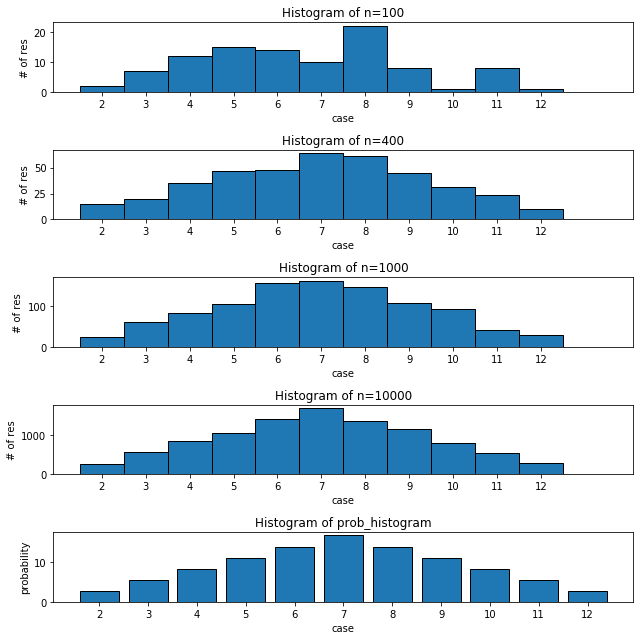

In [28]:
# 한쌍의 주사위를 던져 나온 눈의 합
res = toss_dice(n=100)
res2 = toss_dice(n=400)
res3 = toss_dice(n=1000)
res4 = toss_dice(n=10000)

title=['n=100', 'n=400', 'n=1000', 'n=10000', 'prob_histogram']
res_l=[res, res2, res3, res4]

fig, axes = plt.subplots(5, 1, figsize=(9,9))

idx = 0

for i in range(5):
    ax = axes[i]
    
    if i == 4:
        prob = cal_prob_dice()
        ax.bar(np.arange(2,13, 1), height = prob, ec='k')
        ax.set_xticks(np.arange(2,13, 1))
        ax.set_title(f'Histogram of {title[idx]}')
        ax.set_xlabel('case')
        ax.set_ylabel('probability')
        
    else:
        ax.hist(res_l[idx], bins=np.arange(1.5, 14, 1), ec='k')
        ax.set_xticks(np.arange(2,13, 1))
        ax.set_title(f'Histogram of {title[idx]}')
        ax.set_xlabel('case')
        ax.set_ylabel('# of res')
    idx += 1    
    
plt.tight_layout()